In [15]:
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
import pandas as pd

In [16]:
f_data = pd.read_csv('../data/tweets_final.csv')
f_data = f_data.iloc[0:500,:]
f_data.head(3)

,Datetime,Tweet Id,Text,Username
0,2022-06-17 23:59:41+00:00,1537948125628747777,@BitMartExchange To the Moon 💯💵💎\n@galuka156 @...,cozyhomes88
1,2022-06-17 23:59:27+00:00,1537948068431007744,THIS!!!....@metazooxyz with @MrSweMusic1...RIG...,TTJP_1
2,2022-06-17 23:59:02+00:00,1537947961983832066,In #Mars4 #game demo you can free your imagina...,Dubai_community


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True)
# under the hood - lowercasing,removing special chars,removing stop words
input_matrix = vectorizer.fit_transform(f_data.Text).todense()

In [18]:
svd_modeling= TruncatedSVD(n_components=4, algorithm='randomized', n_iter=100, random_state=122)
svd_modeling.fit(input_matrix)
components=svd_modeling.components_
vocab = vectorizer.get_feature_names()

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
topic_word_list = []
def get_topics(components):
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
    return topic_word_list
get_topics(components)

['  otherdeed mayc otherside whaleanalytica ape bayc bought',
 '  nft https metaverse crypto nfts nftcommunity sold',
 '  atahannft connnft gamer_network_ gamersassembly golegends metalegendsnft monsterdonuts_',
 '  smartchain 99 sold 38 weaselz atahannft connnft']

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


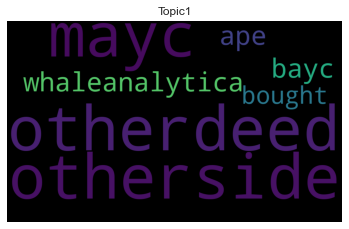

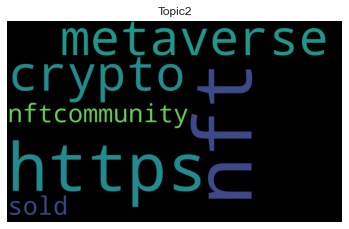

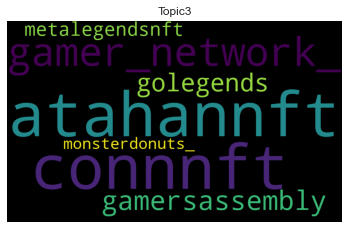

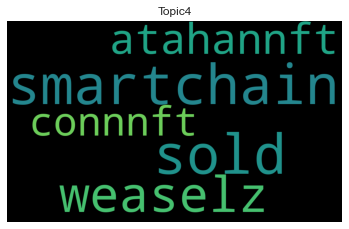

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(4):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()